# Random Forest

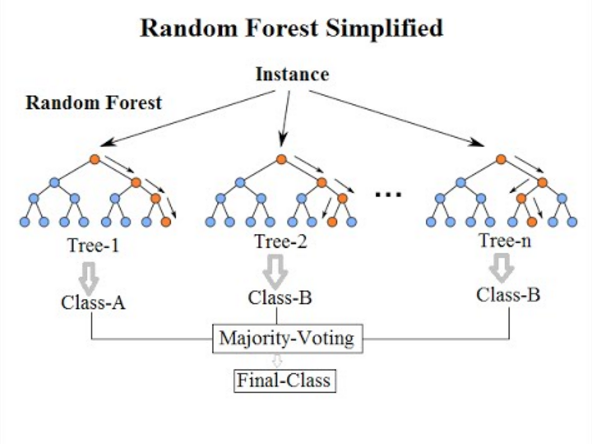

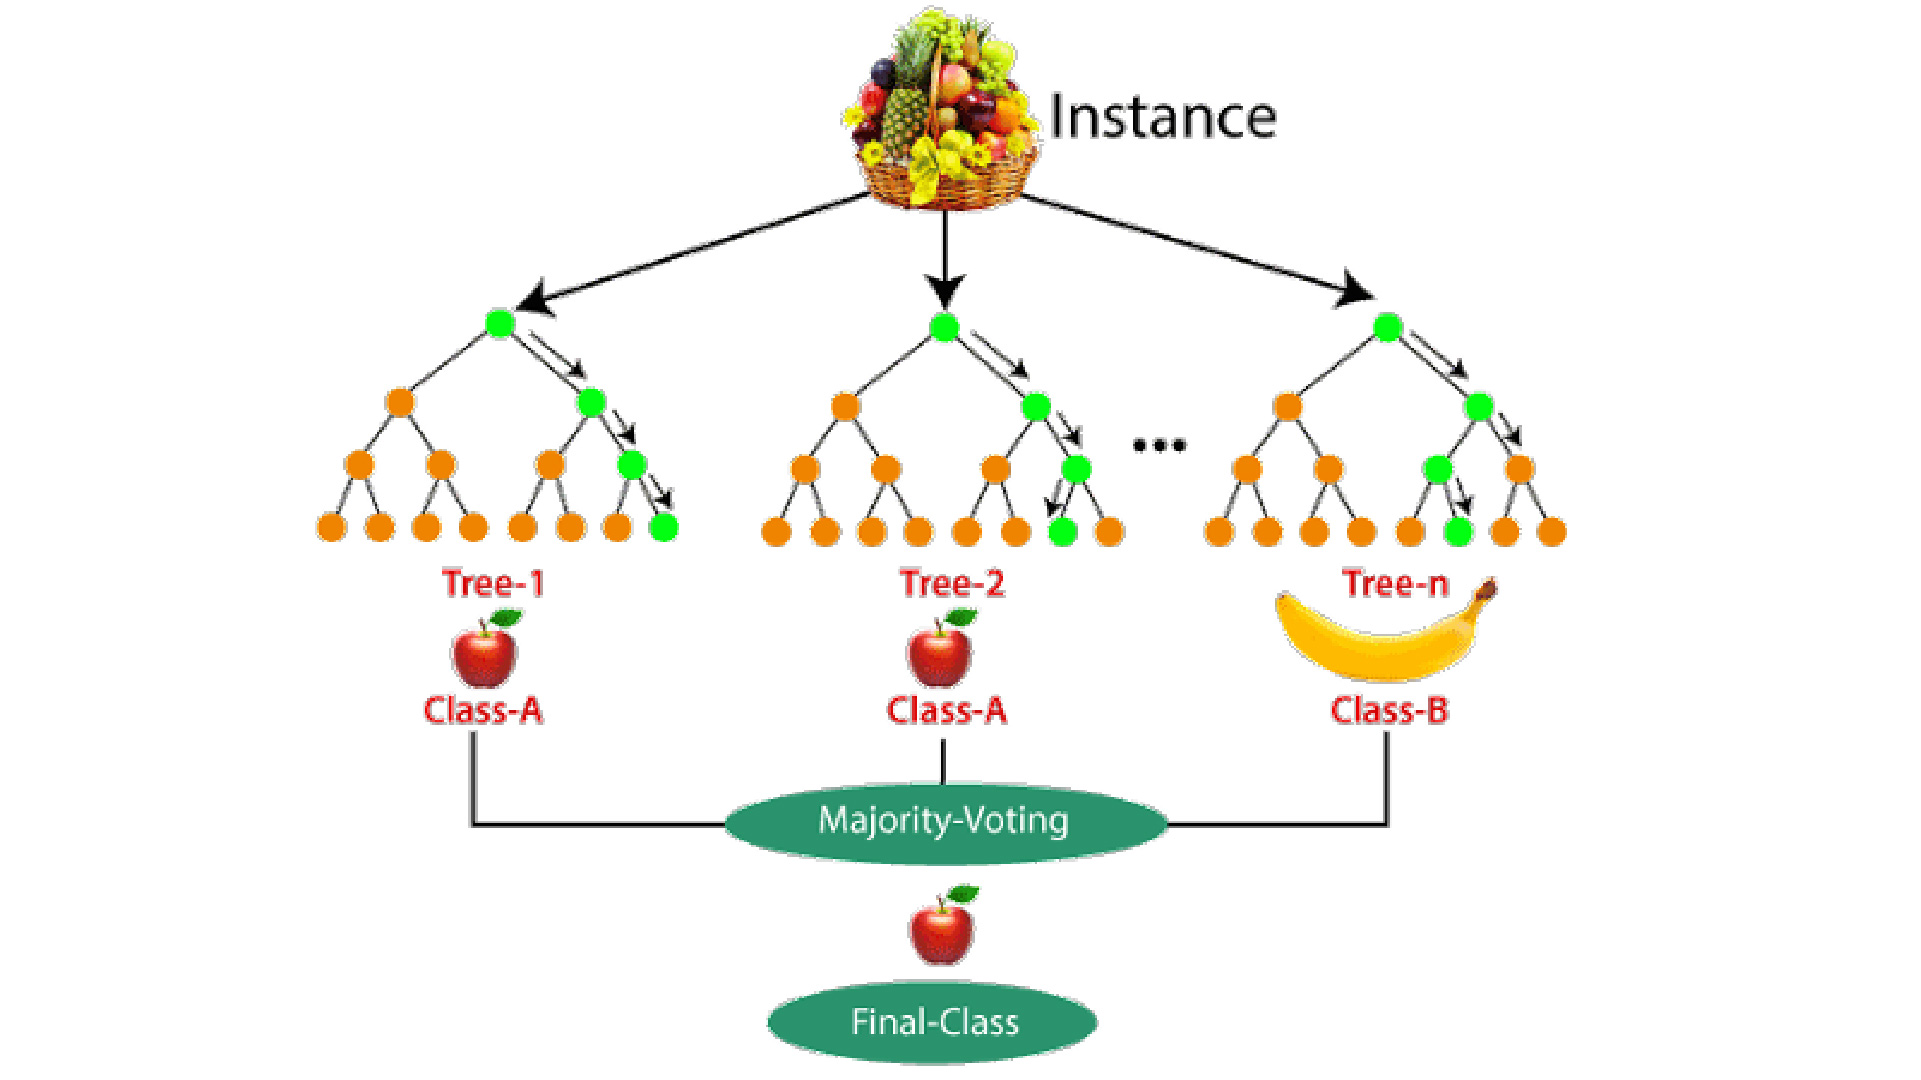

# Further Steps for Improving Random Forest Model

## Hyperparameter Tuning

Hyperparameter tuning is the process of finding the best set of hyperparameters for a learning algorithm. For Random Forests, important hyperparameters include:

- `n_estimators`: The number of trees in the forest.
- `max_depth`: The maximum depth of the tree.
- `min_samples_split`: The minimum number of samples required to split an internal node.
- `min_samples_leaf`: The minimum number of samples required to be at a leaf node.
- `max_features`: The number of features to consider when looking for the best split.


```python

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}




# Mathematical Intuition
Random Forest works on the principle of ensemble learning, which combines multiple classifiers to solve a complex problem and improve the performance of the model.

## Key Concepts:
##### Bootstrap Sampling: 
Random subsets of data are selected to train each tree. This means each tree is trained on a different subset of data.
##### Feature Selection: 
Each node in the tree considers a random subset of features to split on. This randomness helps create diverse trees.
##### Voting/Averaging: 
For classification tasks, the mode of all the predictions of individual trees is taken as the final prediction. For regression tasks, the average of all the predictions is taken.

# Workflow
- Load Data: Import and load the dataset.
- Preprocess Data: Handle missing values, encode categorical variables, and scale features.
- Split Data: Split the dataset into training and testing sets.
- Train Model: Train the Random Forest model using the training set.
- Evaluate Model: Evaluate the model using the testing set.
- Make Predictions: Use the trained model to make predictions

# Load and Preprocess Data
Let's use the Iris dataset as an example.

In [2]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
X = iris['data']
y = iris['target']

target_names = iris['target_names']

print(X.shape)
print(y.shape)

print(target_names)

(150, 4)
(150,)
['setosa' 'versicolor' 'virginica']


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

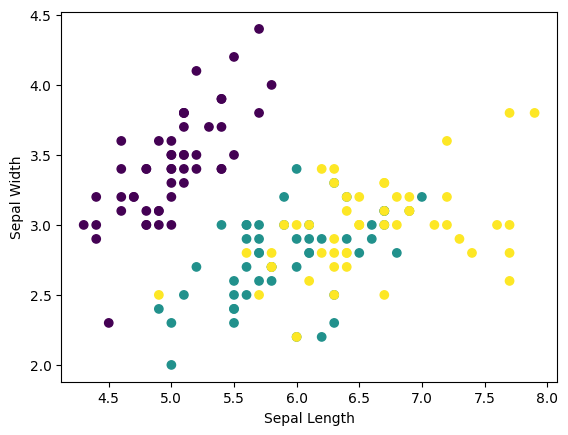

In [19]:
plt.scatter(X[:,0],X[:,1],c = y)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

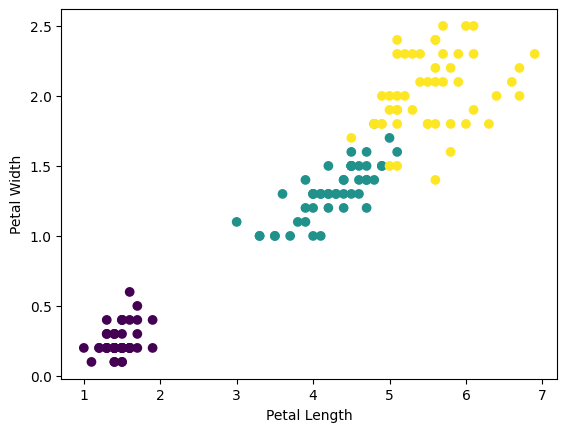

In [21]:
plt.scatter(X[:,2],X[:,3],c = y)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

# Train the Model

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [25]:
model = RandomForestClassifier()
model.fit(X_train,y_train)


RandomForestClassifier()

# Evaluate the Model

In [26]:
y_pred = model.predict(X_test)
print(y_pred)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [27]:
from sklearn.metrics import classification_report,\
confusion_matrix, accuracy_score

In [28]:
model.score(X_test,y_test)

1.0

In [29]:
print(accuracy_score(y_test,y_pred))

1.0


In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [33]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

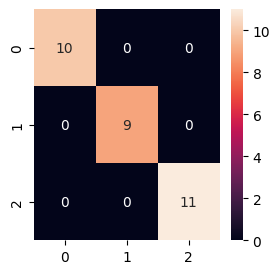

In [37]:
plt.figure(figsize=(3,3))
sns.heatmap(cm,annot=True)
plt.show()

In [46]:
# Final Pred
sepal_lt = 2.3
sepal_wt = 3.4
petal_lt = 5.5
petal_wt = 6.4

dummy_data = [[sepal_lt,sepal_wt,petal_lt,petal_wt]]

pred = model.predict(dummy_data)[0]

flower_name = target_names[pred]

print('Flower name is: ',flower_name)

Flower name is:  virginica


[[2.3, 0.4, 0.5, 6.4]]

# Conclusion
In this markdown, we have explored Random Forests, a powerful ensemble learning method. We discussed its mathematical intuition, workflow, and implemented a Random Forest classifier using Python. Random Forests are effective for both classification and regression tasks and are known for their robustness and ability to handle large datasets with higher dimensionality.

# Practice